# "PSO Algorithm for training ANNs"
> "Training ANNs using Particle Swarm Optimization algorithm"

- toc: true
- comments: true
- image: images/PSO.gif
- categories: [project]
- tags: [ANN, PSO, Python, Numpy, Pandas]
- badges: true
- twitter_large_image: true
- featured: true

## Particle Swarm Optimization Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

np.random.seed(10)

In [2]:
def objective_fucntion(x):
    y = np.sum(x **2)
    return y

In [3]:
def objective_fucntion_group(x):
    y = np.sum(x **2, axis = 1)
    return y

In [4]:
#PSO parameters
p = 10
c1 = 1.5
c2 = 1
c3 = 1.5 
iterations = 3000 
w1 = 0.9 - ((0.9-0.4)/iterations)*np.linspace(0, iterations, iterations)
w2 = 0.5
d = 5
n_informants = 3

In [5]:
particles = np.random.uniform(size = (p, d))
V = np.random.uniform(size = (p, d))

costs = np.zeros((p,1))
costs = objective_fucntion_group(particles)

pbest = np.copy(particles)
pbest_cost = np.copy(costs)

gbest = pbest[pbest_cost.argmin(), :]
gbest_cost = pbest_cost.min()

overall_best_cost = np.zeros((iterations, 1))

In [6]:
gbest

array([0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [7]:
informants = {}
for i in range(1, len(particles) +1):
    informants["p"+str(i)] = particles[np.random.choice(particles.shape[0], n_informants, replace=False)]
    
informants_indices = {}
for i in range(1, len(particles) +1):
    informants_indices["p"+str(i)] = np.random.choice(particles.shape[0], n_informants, replace=False)

In [8]:
informants_indices

{'p1': array([7, 8, 2]),
 'p2': array([0, 4, 6]),
 'p3': array([6, 5, 9]),
 'p4': array([3, 1, 4]),
 'p5': array([4, 9, 2]),
 'p6': array([8, 7, 6]),
 'p7': array([3, 6, 7]),
 'p8': array([2, 8, 1]),
 'p9': array([8, 5, 7]),
 'p10': array([8, 7, 0])}

In [9]:
informants

{'p1': array([[0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715],
        [0.8052232 , 0.52164715, 0.90864888, 0.31923609, 0.09045935],
        [0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096]]),
 'p2': array([[0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096],
        [0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715],
        [0.8052232 , 0.52164715, 0.90864888, 0.31923609, 0.09045935]]),
 'p3': array([[0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317],
        [0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578],
        [0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096]]),
 'p4': array([[0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317],
        [0.68535982, 0.95339335, 0.00394827, 0.51219226, 0.81262096],
        [0.43401399, 0.61776698, 0.51313824, 0.65039718, 0.60103895]]),
 'p5': array([[0.61252607, 0.72175532, 0.29187607, 0.91777412, 0.71457578],
        [0.30070006, 0.11398436, 0.82868133, 0.04689

In [10]:
lbest = []
lbest_cost = []

for p in informants:
    local_informants = informants[p]
    l_costs = objective_fucntion_group(local_informants)
    lbest.append(local_informants[l_costs.argmin(), :])
    lbest_cost.append(l_costs.min())
    
lbest = np.array(lbest)
lbest_cost = np.array(lbest_cost)

In [11]:
lbest

array([[0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715],
       [0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715],
       [0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317],
       [0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317],
       [0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981],
       [0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317],
       [0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981],
       [0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981],
       [0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715],
       [0.30070006, 0.11398436, 0.82868133, 0.04689632, 0.62628715]])

In [12]:
def update_informants(local_informnts_indices, X):
    
    local_informnts_indices = list(local_informnts_indices)
    new_local_informants = X[local_informnts_indices , :]
    
    return new_local_informants

## PSO without Informants

In [13]:
X = np.copy(particles)

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c1 * np.random.rand(d) * (pbest[j] - X[j])+ c3 * np.random.rand(d) * (gbest - X[j])

        X[j] = X[j] + V[j]

        costs[j] = objective_fucntion(X[j])

        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
    
    overall_best_cost[i] = gbest_cost

In [14]:
pso_global = gbest
pso_global

array([-1.43505619e-94,  2.95694915e-94,  3.36451706e-94, -1.63339754e-94,
       -2.10542732e-94])

Text(0.5, 1.0, 'PSO without Informants')

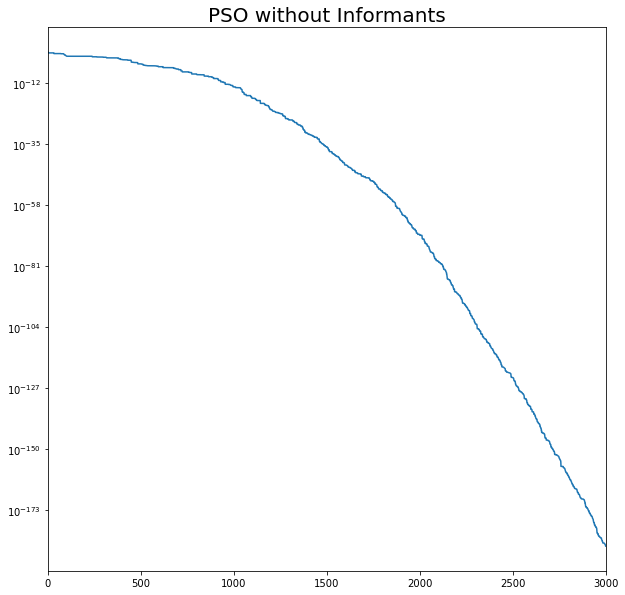

In [15]:
plt.figure(figsize = (10,10))
plt.semilogy(overall_best_cost)
plt.xlim([0, iterations])
plt.title("PSO without Informants", fontsize = 20)

In [16]:
gbest_cost

2.922372131128654e-187

## PSO with Informants included

In [17]:
X = np.copy(particles)
informants_new = informants.copy()

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c1 * np.random.rand(d) * (pbest[j] - X[j])+ c2 * np.random.rand(d) * (lbest[j] - X[j])+ c3 * np.random.rand(d) * (gbest - X[j])

        X[j] = X[j] + V[j]

        costs[j] = objective_fucntion(X[j])

        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
    
    #update informants 
    lcosts = np.zeros((n_informants,1))
                
    for i, p in enumerate(informants_new):   
        informants_new[p] = update_informants(informants_indices[p] , X)
        lcosts = objective_fucntion_group(informants_new[p])
        local_informants = informants_new[p]
        if lcosts.min() < lbest_cost[i]:
            lbest[i] = local_informants[lcosts.argmin(), :]
            lbest_cost[i] = lcosts.min()
            
    overall_best_cost[i] = gbest_cost
      

In [18]:
pso_local_global = gbest
pso_local_global

array([ 5.09279709e-124,  1.68712815e-123,  5.68051795e-124,
       -6.28723826e-124, -4.46644209e-123])

Text(0.5, 1.0, 'PSO with Informants')

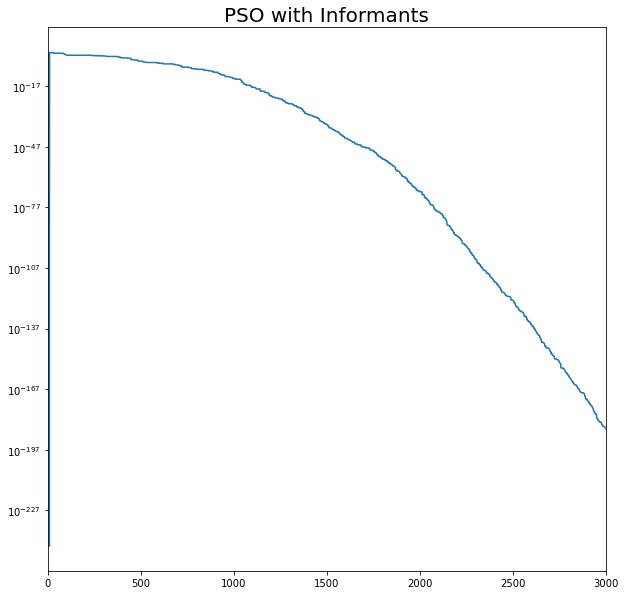

In [19]:
plt.figure(figsize = (10,10))
plt.semilogy(overall_best_cost)
plt.xlim([0, iterations])
plt.title("PSO with Informants", fontsize = 20)

In [20]:
gbest_cost

2.377284861761937e-245

### Trying different hyperparameters

In [21]:
X = np.copy(particles)

it = 5000
c4 = 0.7
c5 = 2
c6 = 0.8
overall_best_cost = np.zeros((it, 1))

for i in range(it):
    for j in range(10):
        V[j] = w2 * V[j] + c4 * np.random.rand(d) * (pbest[j] - X[j])+ c6 * np.random.rand(d) * (gbest - X[j])

        X[j] = X[j] + V[j]

        costs[j] = objective_fucntion(X[j])

        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
    
    overall_best_cost[i] = gbest_cost

Text(0.5, 1.0, 'PSO without Informants')

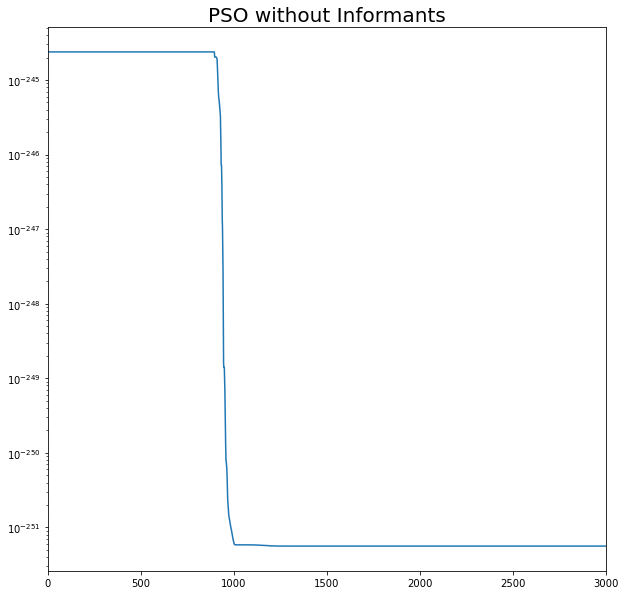

In [22]:
plt.figure(figsize = (10,10))
plt.semilogy(overall_best_cost)
plt.xlim([0, iterations])
plt.title("PSO without Informants", fontsize = 20)

## <span style='background:yellow'> Training ANN with PSO </span>

In [23]:
df = pd.read_csv('data_banknote_authentication.txt',names=['VAR', 'SKEW', 'Curt', 'Entropy', 'Class'])
data = np.array(df)
print("Input Data shape: ", data.shape)

Input Data shape:  (1372, 5)


In [24]:
#input data & target
X_data = data[:, :4].T
Y = data[:, 4, None].T

#ANN layers
m = 1372
n_x = 4
n_h = 5
n_y = 1

#PSO dimensions & No of particles
d_fb = int(n_x*n_h + n_h*n_y + n_h + n_y) #No of dimensions for forward propagation
p = int(10)                   #No of particles for forward propagation

print("X_data shape: ", X_data.shape)
print("Y shape: ", Y.shape)

X_data shape:  (4, 1372)
Y shape:  (1, 1372)


In [25]:
def initialize_particles(p, d_fb):
    fb_particles = np.random.uniform(size = (p, d_fb))
    fb_V = np.random.uniform(size = (p, d_fb))
    
    return fb_particles, fb_V

In [26]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

In [27]:
def forward_propagation_one(X_data, one_particle_fb, n_x, n_h, n_y):

    W1 = one_particle_fb[0:20].reshape((n_h,n_x))
    b1 = one_particle_fb[20:25].reshape((n_h,1))
    W2 = one_particle_fb[25:30].reshape((n_y,n_h))
    b2 = one_particle_fb[30:31].reshape((n_y,1))

    Z1 = np.dot(W1, X_data)+b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1)+b2
    A2 = sigmoid(Z2)

    return A2

In [28]:
def compute_cost(A, Y):

    m = Y.shape[1]
    
    cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))

    return cost

In [29]:
def compute_cost_2(A, Y):

    m = Y.shape[1]
    
    cost = (1/m)*np.sum((Y-A)**2)

    return cost

In [30]:
def compute_accuracy(X_data, Y, one_particle_fb, n_x, n_h, n_y):
    
    A= forward_propagation_one(X_data, one_particle_fb, n_x, n_h, n_y)
    A = np.where(A<0.5, 0, 1)
    acc = np.mean(A == Y)

    return acc

## Training ANN using informed PSO

### Using Cross-Entropy as cost function

In [31]:
particles_fb = np.random.uniform(size = (p, d_fb))
V_fb = np.random.uniform(size = (p, d_fb))

costs = np.zeros((p,1))
for i, particle in enumerate(particles_fb):
    fb_output = forward_propagation_one(X_data, particle, n_x, n_h, n_y)
    costs[i] = compute_cost(fb_output, Y)
    
pbest = np.copy(particles_fb)
pbest_cost = np.copy(costs)

gbest = pbest[pbest_cost.argmin(), :]
gbest_cost = pbest_cost.min()

overall_best_cost = np.zeros((iterations, 1))

# print(particles_fb, "\n\n")
# print(V_fb)

In [32]:
#creating informants for ANN

informants_fb = {}
for i in range(1, len(particles_fb) +1):
    informants_fb["p"+str(i)] = particles_fb[np.random.choice(particles_fb.shape[0], n_informants, replace=False)]
    
informants_indices_fb = {}
for i in range(1, len(particles_fb) +1):
    informants_indices_fb["p"+str(i)] = np.random.choice(particles_fb.shape[0], n_informants, replace=False)
    

#Choosing lbest for each particle

lbest = []
lbest_cost = []
for p in informants_fb:
    local_informants_fb = informants_fb[p]
    
    l_costs = np.zeros((3,1))
    for i, l in enumerate(local_informants_fb):
        fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
        l_costs[i] = compute_cost(fb_output, Y)
    
    lbest.append(local_informants_fb[l_costs.argmin(), :])
    lbest_cost.append(l_costs.min())
lbest = np.array(lbest)
lbest_cost = np.array(lbest_cost)

In [33]:
# Training ANN with PSO

X = np.copy(particles_fb)
V = np.copy(V_fb)
informants_new = informants_fb.copy()

t0 = time.time()

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c1 * np.random.rand(d_fb) * (pbest[j] - X[j])+ c2 * np.random.rand(d_fb) * (lbest[j] - X[j])+ c3 * np.random.rand(d_fb) * (gbest - X[j])

        X[j] = X[j] + V[j]
        
        A2 = forward_propagation_one(X_data, X[j], n_x, n_h, n_y)

        costs[j] = compute_cost(A2, Y)
#         print(costs)
        
        #Update pbest & gbest
        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
#         print(gbest_cost)
        
    #update informants 
    lcosts = np.zeros((n_informants,1))
                
    for i, p in enumerate(informants_new):   
        informants_new[p] = update_informants(informants_indices_fb[p] , X)
        local_informants = informants_new[p]
        
        #Calculate lcosts
        for i, l in enumerate(local_informants_fb):
            fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
            lcosts[i] = compute_cost(fb_output, Y)
        
        #Update lbest
        if lcosts.min() < lbest_cost[i]:
            lbest[i] = local_informants[lcosts.argmin(), :]
            lbest_cost[i] = lcosts.min()
#     print(gbest_cost)        
    overall_best_cost[i] = gbest_cost
    
t1 = time.time()
print("*"*60)
print("Elapsed time for the training is: ",t1-t0)
      

<ipython-input-28-f92a4d38fec1>:5: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
<ipython-input-28-f92a4d38fec1>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


************************************************************
Elapsed time for the training is:  17.68942403793335


In [34]:
compute_accuracy(X_data, Y, gbest, n_x, n_h, n_y)

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


0.9110787172011662

In [35]:
gbest_cost

array([0.39647052])

 #### Trying with different hyperparameters

In [36]:
# Training ANN with PSO

X = np.copy(particles_fb)
V = np.copy(V_fb)
informants_new = informants_fb.copy()

c4 = 0.7
c5 = 0.5
c6 = 0.8

t0 = time.time()

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c4 * np.random.rand(d_fb) * (pbest[j] - X[j])+ c5 * np.random.rand(d_fb) * (lbest[j] - X[j])+ c6 * np.random.rand(d_fb) * (gbest - X[j])

        X[j] = X[j] + V[j]
        
        A2 = forward_propagation_one(X_data, X[j], n_x, n_h, n_y)

        costs[j] = compute_cost(A2, Y)
#         print(costs)
        
        #Update pbest & gbest
        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
#         print(gbest_cost)
        
    #update informants 
    lcosts = np.zeros((n_informants,1))
                
    for i, p in enumerate(informants_new):   
        informants_new[p] = update_informants(informants_indices_fb[p] , X)
        local_informants = informants_new[p]
        
        #Calculate lcosts
        for i, l in enumerate(local_informants_fb):
            fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
            lcosts[i] = compute_cost(fb_output, Y)
        
        #Update lbest
        if lcosts.min() < lbest_cost[i]:
            lbest[i] = local_informants[lcosts.argmin(), :]
            lbest_cost[i] = lcosts.min()
#     print(gbest_cost)        
    overall_best_cost[i] = gbest_cost
    
t1 = time.time()
print("*"*60)
print("Elapsed time for the training is: ",t1-t0)
      

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))
<ipython-input-28-f92a4d38fec1>:5: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
<ipython-input-28-f92a4d38fec1>:5: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))


************************************************************
Elapsed time for the training is:  16.136921405792236


In [37]:
compute_accuracy(X_data, Y, gbest, n_x, n_h, n_y)

0.8666180758017493

In [38]:
gbest_cost

array([0.41470815])

### Using MSE as a cost function

In [39]:
d_fb = int(n_x*n_h + n_h*n_y + n_h + n_y) #No of dimensions for forward propagation
p = int(10)
particles_fb = np.random.uniform(size = (10, 31))
V_fb = np.random.uniform(size = (10, 31))

costs = np.zeros((p,1))
for i, particle in enumerate(particles_fb):
    fb_output = forward_propagation_one(X_data, particle, n_x, n_h, n_y)
    costs[i] = compute_cost_2(fb_output, Y)
    
pbest = np.copy(particles_fb)
pbest_cost = np.copy(costs)

gbest = pbest[pbest_cost.argmin(), :]
gbest_cost = pbest_cost.min()

overall_best_cost = np.zeros((iterations, 1))

# print(particles_fb, "\n\n")
# print(V_fb)

In [40]:
#creating informants for ANN

informants_fb = {}
for i in range(1, len(particles_fb) +1):
    informants_fb["p"+str(i)] = particles_fb[np.random.choice(particles_fb.shape[0], n_informants, replace=False)]
    
informants_indices_fb = {}
for i in range(1, len(particles_fb) +1):
    informants_indices_fb["p"+str(i)] = np.random.choice(particles_fb.shape[0], n_informants, replace=False)
    

#Choosing lbest for each particle

lbest = []
lbest_cost = []
for p in informants_fb:
    local_informants_fb = informants_fb[p]
    
    l_costs = np.zeros((3,1))
    for i, l in enumerate(local_informants_fb):
        fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
        l_costs[i] = compute_cost_2(fb_output, Y)
    
    lbest.append(local_informants_fb[l_costs.argmin(), :])
    lbest_cost.append(l_costs.min())
lbest = np.array(lbest)
lbest_cost = np.array(lbest_cost)

In [41]:
# Training ANN with PSO

X = np.copy(particles_fb)
V = np.copy(V_fb)
informants_new = informants_fb.copy()

t0 = time.time()

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c1 * np.random.rand(d_fb) * (pbest[j] - X[j])+ c2 * np.random.rand(d_fb) * (lbest[j] - X[j])+ c3 * np.random.rand(d_fb) * (gbest - X[j])

        X[j] = X[j] + V[j]
        
        A2 = forward_propagation_one(X_data, X[j], n_x, n_h, n_y)

        costs[j] = compute_cost_2(A2, Y)
#         print(costs)
        
        #Update pbest & gbest
        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
#         print(gbest_cost)
        
    #update informants 
    lcosts = np.zeros((n_informants,1))
                
    for i, p in enumerate(informants_new):   
        informants_new[p] = update_informants(informants_indices_fb[p] , X)
        local_informants = informants_new[p]
        
        #Calculate lcosts
        for i, l in enumerate(local_informants_fb):
            fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
            lcosts[i] = compute_cost_2(fb_output, Y)
        
        #Update lbest
        if lcosts.min() < lbest_cost[i]:
            lbest[i] = local_informants[lcosts.argmin(), :]
            lbest_cost[i] = lcosts.min()
#     print(gbest_cost)        
    overall_best_cost[i] = gbest_cost
    
t1 = time.time()
print("*"*60)
print("Elapsed time for the training is: ",t1-t0)
      

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


************************************************************
Elapsed time for the training is:  23.069150924682617


In [42]:
compute_accuracy(X_data, Y, gbest, n_x, n_h, n_y)

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


0.7842565597667639

In [43]:
gbest_cost

array([0.21574344])

 ### Trying with different hyperparameters

In [44]:
# Training ANN with PSO

X = np.copy(particles_fb)
V = np.copy(V_fb)
informants_new = informants_fb.copy()

c4 = 0.7
c5 = 0.5
c6 = 0.8

t0 = time.time()

for i in range(iterations):
    for j in range(10):
        V[j] = w1[i] * V[j] + c4 * np.random.rand(d_fb) * (pbest[j] - X[j])+ c5 * np.random.rand(d_fb) * (lbest[j] - X[j])+ c6 * np.random.rand(d_fb) * (gbest - X[j])

        X[j] = X[j] + V[j]
        
        A2 = forward_propagation_one(X_data, X[j], n_x, n_h, n_y)

        costs[j] = compute_cost_2(A2, Y)
#         print(costs)
        
        #Update pbest & gbest
        if costs[j] < pbest_cost[j]:
            pbest[j] = X[j]
            pbest_cost[j] = costs[j]
            if costs[j] < gbest_cost:
                gbest = X[j]
                gbest_cost = costs[j]
#         print(gbest_cost)
        
    #update informants 
    lcosts = np.zeros((n_informants,1))
                
    for i, p in enumerate(informants_new):   
        informants_new[p] = update_informants(informants_indices_fb[p] , X)
        local_informants = informants_new[p]
        
        #Calculate lcosts
        for i, l in enumerate(local_informants_fb):
            fb_output = forward_propagation_one(X_data, l, n_x, n_h, n_y)
            lcosts[i] = compute_cost_2(fb_output, Y)
        
        #Update lbest
        if lcosts.min() < lbest_cost[i]:
            lbest[i] = local_informants[lcosts.argmin(), :]
            lbest_cost[i] = lcosts.min()
#     print(gbest_cost)        
    overall_best_cost[i] = gbest_cost
    
t1 = time.time()
print("*"*60)
print("Elapsed time for the training is: ",t1-t0)
      

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


************************************************************
Elapsed time for the training is:  23.40227246284485


In [45]:
compute_accuracy(X_data, Y, gbest, n_x, n_h, n_y)

<ipython-input-26-d2ade04057a6>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


0.9591836734693877

In [46]:
gbest_cost

array([0.04081633])